## <a name="wrangling">More Data Wrangling</a>

- Data Cleaning and Filtering

- Joining and Combining Datasets

- Hierarchical Indexing and Reshaping

- Grouping and Aggregation

In [3]:
import pandas as pd
import numpy as np

### Missing Data

- There may be missing entries in datasets you read, or the results of an operation might introduce missing values. In `pandas`, the floating point `NaN` is used to indicate missing numeric values. `None` is sometimes used to indicate missing string values.


- Any arithmetic operation with a `NaN` will result in a `NaN`. So an entire series will end up with `NaN`s if they are not handled appropriately. 


- `pandas` provides a number of helper routines for dropping, filtering and replacing missing values. We'll look at a few examples here.

- As of `pandas` 1.0.0, `pandas.NA` is available. It can be used for both numeric and non-numeric data. See also [Nullable Integer Arrays](https://pandas.pydata.org/docs/user_guide/integer_na.html) that support null values in integer data.

In [4]:
f1 = pd.DataFrame(np.arange(12).reshape((4,3)), columns=list('ABC'), index=['susan', 'joe', 'frank', 'al'])
f2 = pd.DataFrame(np.arange(9).reshape((3,3)), columns=list('BCD'), index=['susan', 'joe', 'robert'])
display(f1)
display(f2)

,A,B,C
susan,0,1,2
joe,3,4,5
frank,6,7,8
al,9,10,11


,B,C,D
susan,0,1,2
joe,3,4,5
robert,6,7,8


In [5]:

result = f1+f2
result["E"] = 10
display(result)

,A,B,C,D,E
al,NaN,NaN,NaN,NaN,10
frank,NaN,NaN,NaN,NaN,10
joe,NaN,7.0,9.0,NaN,10
robert,NaN,NaN,NaN,NaN,10
susan,NaN,1.0,3.0,NaN,10


In [11]:
# Dropping NA values using dropna(). Consult documentation of 
# dropna() for more details.

# By default, dropna will drop any row with a missing value
display(result.dropna(axis=0)) 



,A,B,C,D,E


In [10]:

# We can operate along the columns
display(result.dropna(axis=1))

# We can specify a threshold that we can tolerate
display( result.dropna(thresh=2) )

,E
al,10
frank,10
joe,10
robert,10
susan,10


,A,B,C,D,E
joe,NaN,7.0,9.0,NaN,10
susan,NaN,1.0,3.0,NaN,10


In [13]:

data = {
    'A': [1, np.nan, 3, 4],
    'B': [5, np.nan, np.nan, 8],
    'C': [9, 10, 11, 12]
}
df = pd.DataFrame(data)
df.loc[4] = [np.nan, np.nan, np.nan]
display(df)

df.dropna(how='all')


,A,B,C
0,1.0,5.0,9.0
1,NaN,NaN,10.0
2,3.0,NaN,11.0
3,4.0,8.0,12.0
4,NaN,NaN,NaN


,A,B,C
0,1.0,5.0,9.0
1,NaN,NaN,10.0
2,3.0,NaN,11.0
3,4.0,8.0,12.0


In [14]:
# Check Specific Columns for NaN

# Only check columns 'A' and 'B' for NaN
df.dropna(subset=['A', 'B'])

,A,B,C
0,1.0,5.0,9.0
3,4.0,8.0,12.0


### The `isna()` Function in pandas

The `isna()` function in pandas is used to detect missing values (e.g., `NaN`, `None`, or `NaT`) in a DataFrame or Series. It returns a boolean mask where `True` indicates the presence of a missing value. 

#### Syntax
```python
DataFrame.isna()      # For DataFrames
Series.isna()         # For Series

In [19]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eva', 'Frank'],
    'Age': [28, np.nan, 35, 22, 45, np.nan],
    'Email': ['alice@email.com', np.nan, 'charlie@email.com', 'diana@email.com', np.nan, 'frank@email.com'],
    'Salary': [50000, 60000, np.nan, np.nan, 90000, 75000],
    'Membership': [True, False, True, np.nan, True, False]
}

df = pd.DataFrame(data)
print("Original Data:")
print(df)

Original Data:
      Name   Age              Email   Salary Membership
0    Alice  28.0    alice@email.com  50000.0       True
1      Bob   NaN                NaN  60000.0      False
2  Charlie  35.0  charlie@email.com      NaN       True
3    Diana  22.0    diana@email.com      NaN        NaN
4      Eva  45.0                NaN  90000.0       True
5    Frank   NaN    frank@email.com  75000.0      False


In [20]:
# Detect Missing Values in a DataFrame
df.isna()

,Name,Age,Email,Salary,Membership
0,False,False,False,False,False
1,False,True,True,False,False
2,False,False,False,True,False
3,False,False,False,True,True
4,False,False,True,False,False
5,False,True,False,False,False


In [21]:
# Count Missing Values per Column
df.isna().sum()

Name          0
Age           2
Email         2
Salary        2
Membership    1
dtype: int64

In [24]:
# Filter Rows with Missing Values
# Get rows where column Age has NaN
df[df['Age'].isna()]

,Name,Age,Email,Salary,Membership
1,Bob,NaN,NaN,60000.0,False
5,Frank,NaN,frank@email.com,75000.0,False


In [25]:
# Combine with any()/all()
# Rows with ANY missing value
df[df.isna().any(axis=1)]

,Name,Age,Email,Salary,Membership
1,Bob,NaN,NaN,60000.0,False
2,Charlie,35.0,charlie@email.com,NaN,True
3,Diana,22.0,diana@email.com,NaN,NaN
4,Eva,45.0,NaN,90000.0,True
5,Frank,NaN,frank@email.com,75000.0,False


<Axes: >

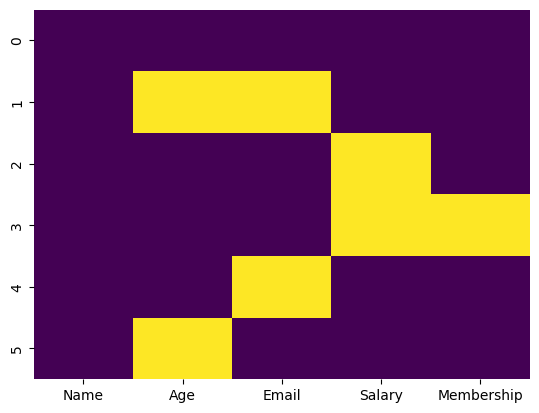

In [26]:
#Visualize Missing Values
# Visualize missing data (optional, requires matplotlib/seaborn)
import seaborn as sns
sns.heatmap(df.isna(), cbar=False, cmap='viridis')

In [27]:
# Drop rows where both 'Email' and 'Salary' are missing
clean_df = df.dropna(subset=['Email', 'Salary'], how='all')
print("\nData after dropping rows where Email AND Salary are missing:")
print(clean_df)


Data after dropping rows where Email AND Salary are missing:
      Name   Age              Email   Salary Membership
0    Alice  28.0    alice@email.com  50000.0       True
1      Bob   NaN                NaN  60000.0      False
2  Charlie  35.0  charlie@email.com      NaN       True
3    Diana  22.0    diana@email.com      NaN        NaN
4      Eva  45.0                NaN  90000.0       True
5    Frank   NaN    frank@email.com  75000.0      False


## The `fillna()` Function in pandas

The `fillna()` function in pandas is used to **replace missing values** (e.g., `NaN`, `None`, or `NaT`) in a DataFrame or Series with specified values or strategies. It is a critical tool for handling missing data during preprocessing.

### Syntax
```python
DataFrame.fillna(value, method, axis, inplace, limit)  # For DataFrames
Series.fillna(value, method, axis, inplace, limit)     # For Series

In [2]:
# Create a sample dataset
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Product': ['A', 'B', np.nan, 'A', 'C', 'B', np.nan, 'A', 'C', 'B'],
    'Price': [100, 150, np.nan, 100, 200, 150, 180, np.nan, 200, 150],
    'Quantity': [5, 3, 2, np.nan, 4, 5, 3, 2, 4, np.nan],
    'Region': ['North', 'South', np.nan, 'East', 'West', np.nan, 'North', 'South', 'East', 'West'],
    'Customer Rating': [4.5, 3.8, 4.2, np.nan, np.nan, 3.5, 4.1, 4.0, np.nan, 3.9]
}

df = pd.DataFrame(data)
print("Original Sales Data:")
print(df)

Original Sales Data:
        Date Product  Price  Quantity Region  Customer Rating
0 2023-01-01       A  100.0       5.0  North              4.5
1 2023-01-02       B  150.0       3.0  South              3.8
2 2023-01-03     NaN    NaN       2.0    NaN              4.2
3 2023-01-04       A  100.0       NaN   East              NaN
4 2023-01-05       C  200.0       4.0   West              NaN
5 2023-01-06       B  150.0       5.0    NaN              3.5
6 2023-01-07     NaN  180.0       3.0  North              4.1
7 2023-01-08       A    NaN       2.0  South              4.0
8 2023-01-09       C  200.0       4.0   East              NaN
9 2023-01-10       B  150.0       NaN   West              3.9


In [3]:
df.isna().sum()

Date               0
Product            2
Price              2
Quantity           2
Region             2
Customer Rating    3
dtype: int64

### 1. **Fill with a Static Value**
Replace missing values with a fixed scalar (e.g., `0`, `'Unknown'`).


- Advantages:
    Simplicity: Easy to implement with no complex calculations.

    Preserves Data Structure: Maintains the original shape of the dataset.

    Transparency: Clearly marks missing values with a placeholder.

- Use Cases:
    Categorical columns (e.g., Product, Region).

    When missing values are negligible and replacing them won’t bias analysis.

- Limitations:
    Distortion: May introduce bias (e.g., filling 0 in Price could skew averages).

    Loss of Information: Hides the fact that data was originally missing.

In [5]:
df_filled = df.fillna({
    'Product': 'Unknown',
    'Price': 0,
    'Region': 'Global',
    'Customer Rating': df['Customer Rating'].mean()  # Hybrid approach
})

In [6]:
df_filled

,Date,Product,Price,Quantity,Region,Customer Rating
0,2023-01-01,A,100.0,5.0,North,4.5
1,2023-01-02,B,150.0,3.0,South,3.8
2,2023-01-03,Unknown,0.0,2.0,Global,4.2
3,2023-01-04,A,100.0,NaN,East,4.0
4,2023-01-05,C,200.0,4.0,West,4.0
5,2023-01-06,B,150.0,5.0,Global,3.5
6,2023-01-07,Unknown,180.0,3.0,North,4.1
7,2023-01-08,A,0.0,2.0,South,4.0
8,2023-01-09,C,200.0,4.0,East,4.0
9,2023-01-10,B,150.0,NaN,West,3.9


### 1. **Forward Fill (ffill) / Backward Fill (bfill)**

Propagate the last valid observation forward (ffill) or the next valid observation backward (bfill).


- Advantages:
    Temporal Consistency: Ideal for time-series data (e.g., Date columns).

    No Data Loss: Retains the original data distribution.

    Contextual Relevance: Uses adjacent values, which may reflect real-world patterns.

- Use Cases:
    Time-series datasets (e.g., stock prices, sensor data).

    Ordered data where adjacent values are correlated.

- Limitations:
    Edge Cases: Leading/trailing NaN values remain unfilled.

    Misleading Trends: Can create artificial patterns if data isn’t ordered meaningfully.

In [8]:
# Forward fill missing values in the 'Price' column
df['Price'] = df['Price'].fillna(method='ffill')

# Backward fill missing values in the 'Region' column
df['Region'] = df['Region'].fillna(method='bfill')
display(df)

/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_22312/592394448.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Price'] = df['Price'].fillna(method='ffill')
/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_22312/592394448.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Region'] = df['Region'].fillna(method='bfill')


,Date,Product,Price,Quantity,Region,Customer Rating
0,2023-01-01,A,100.0,5.0,North,4.5
1,2023-01-02,B,150.0,3.0,South,3.8
2,2023-01-03,NaN,150.0,2.0,East,4.2
3,2023-01-04,A,100.0,NaN,East,NaN
4,2023-01-05,C,200.0,4.0,West,NaN
5,2023-01-06,B,150.0,5.0,North,3.5
6,2023-01-07,NaN,180.0,3.0,North,4.1
7,2023-01-08,A,180.0,2.0,South,4.0
8,2023-01-09,C,200.0,4.0,East,NaN
9,2023-01-10,B,150.0,NaN,West,3.9


### 1. **Interpolation**

Estimate missing values using mathematical interpolation (e.g., linear, polynomial).

- Advantages:
    Accurate for Time Series: Captures trends/seasonality better than ffill/bfill.

    Flexible: Supports multiple methods (linear, spline, polynomial).

    Smooth Transitions: Generates realistic intermediate values.

- Use Cases:
    Time-series data with missing values (e.g., stock prices, temperature readings).

    Ordered datasets with a clear progression.

- Limitations:
    Computationally Intensive: Complex methods (e.g., polynomial) require more resources.

    Assumes Linearity: May fail if data has non-linear patterns.

In [ ]:
# Linear interpolation for the 'Price' column (time-aware)
df['Price'] = df['Price'].interpolate(method='time')

### 1. **Model-Based Imputation**

Use machine learning models (e.g., KNN, regression) to predict missing values.


- Advantages:
    Context-Aware: Uses relationships between variables for accurate imputation.

    Robust: Handles complex patterns better than simple methods.

- Use Cases:
    High-stakes domains (e.g., healthcare, finance).

    Datasets with strong feature correlations.

- Limitations:
    Computational Cost: Requires significant resources for large datasets.

    Overfitting Risk: Models may learn noise instead of true patterns.

In [10]:
from sklearn.impute import KNNImputer

# Impute numerical columns using K-Nearest Neighbors
imputer = KNNImputer(n_neighbors=2)
df[['Price', 'Quantity']] = imputer.fit_transform(df[['Price', 'Quantity']])

,Date,Price,Quantity,Customer Rating
count,10,10.000000,10.000000,7.000000
mean,2023-01-05 12:00:00,156.000000,3.450000,4.000000
min,2023-01-01 00:00:00,100.000000,2.000000,3.500000
25%,2023-01-03 06:00:00,150.000000,2.625000,3.850000
50%,2023-01-05 12:00:00,150.000000,3.500000,4.000000
75%,2023-01-07 18:00:00,180.000000,4.000000,4.150000
max,2023-01-10 00:00:00,200.000000,5.000000,4.500000
std,NaN,35.652645,1.116791,0.316228


Date               0
Product            2
Price              0
Quantity           0
Region             0
Customer Rating    3
dtype: int64

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Customer Rating'}>]], dtype=object)

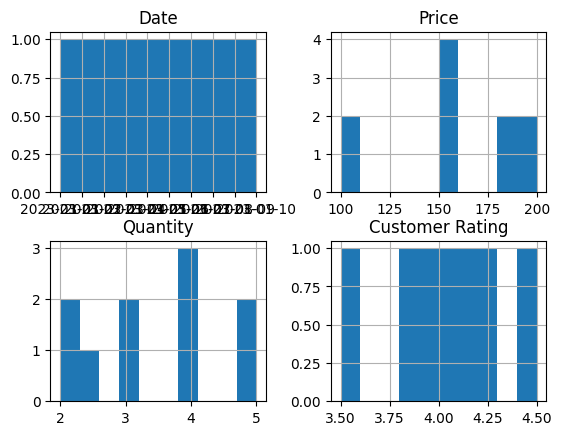

In [12]:
display(df.describe())        # Summary statistics
display(df.isna().sum() )       # Post-cleaning check
df.hist()              # Visualize distributions

In [13]:
# Vectorized string functions for Series

# pandas provides vectorized string functions for pattern matching
# on string series. These are more robust and don't fail on missing
# data (compared to applying a function via map()).

eseries = pd.Series({'rob': 'rob123@gmail.com', 'al' : 'al345@gmail.com', 'susan' : 'susan678@yahoo.com', 'bob' : pd.NA})
display(eseries)

display(eseries.str.contains('gmail'))

# Use a regular expression to extract the username
pattern = '([a-zA-Z0-9]+)@'
display(eseries.str.findall(pattern))

rob        rob123@gmail.com
al          al345@gmail.com
susan    susan678@yahoo.com
bob                    <NA>
dtype: object

rob       True
al        True
susan    False
bob       <NA>
dtype: object

rob        [rob123]
al          [al345]
susan    [susan678]
bob            <NA>
dtype: object

### Combining and Joining Datasets

- Simple concatenations of columns or rows can be done via `pandas.concat`.

- Pandas supports database join operations via `pandas.merge`. A _join_ operation joins two tables based on one or more keys.


- Joins come in a number of flavours: _inner_, _outer_, _left-outer_, _right-outer_.

- We'll look at examples of simple concatenations and joins. Please consult the documentation ([`pandas.concat`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html), [`pandas.merge`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)) for an exhaustive list of supported operations.

## Join Comparison Table

| Join Type | Left Rows | Right Rows | Matches | Unmatched Left  | Unmatched Right  |
|-----------|-----------|------------|---------|-----------------|------------------|
| **Inner** | ✗         | ✗          | ✓       | ✗               | ✗                |
| **Left**  | ✓         | ✗          | ✓       | ✓ (NaN)         | ✗                |
| **Right** | ✗         | ✓          | ✓       | ✗               | ✓ (NaN)          |
| **Outer** | ✓         | ✓          | ✓       | ✓ (NaN)         | ✓ (NaN)          |
| **Cross** | ✓         | ✓          | ✗       | N/A             | N/A              |

### Key:
- **✓**: Included in the result.
- **✗**: Excluded from the result.
- **✓ (NaN)**: Included but filled with `NaN` (missing values).
- **N/A**: Not applicable (no key-based matching for cross joins).



 
# Detailed Descriptions of Joins in Pandas

## 1. **Inner Join**
**Description**:  
Returns **only rows with matching keys** in both DataFrames. Excludes non-matching rows entirely.  

**Visualization**:  
Intersection of two datasets (`A ∩ B`).  

**Use Cases**:  
- Combining datasets where **exact matches** are critical (e.g., linking orders to valid customer IDs).  
- Filtering out incomplete or orphaned records.  

**Key Points**:  
- Most restrictive join type.  
- No `NaN` values in the result.  

---

## Comparison Summary  
| Join Type | Retained Rows          | Unmatched Rows         | Use Case Focus                   |  
|-----------|------------------------|------------------------|----------------------------------|  
| **Inner** | Matching only          | Excluded               | Exact matches, data filtering    |  
| **Left**  | All left + matched     | Left: `NaN`            | Primary dataset completeness     |  
| **Right** | All right + matched    | Right: `NaN`           | Secondary dataset completeness   |  
| **Outer** | All from both          | Both: `NaN`            | Full data audit                  |  
| **Cross** | All combinations       | N/A                    | Scenario modeling                |  
| **Self**  | Internal relationships | Hierarchical `NaN`     | Recursive/hierarchical data      |  

**Key Considerations**:  
- **Data Integrity**: Choose joins based on whether unmatched rows should be retained or discarded.  
- **Performance**: Cross and outer joins can be resource-intensive.  
- **Context**: Align the join type with the analytical goal (e.g., auditing vs. filtering).  

In [37]:
# Concatenating along columns.
df1 = pd.DataFrame(np.arange(6).reshape((3,2)), index=['c','b','a'], columns=['one','two'])
df2 = pd.DataFrame(6+np.arange(6).reshape((3,2)), index=['a','b','c'], columns=['three', 'four'])
display(df1)
display(df2)

display(pd.concat([df2,df1], axis=1, sort=True))


,one,two
c,0,1
b,2,3
a,4,5


,three,four
a,6,7
b,8,9
c,10,11


,three,four,one,two
a,6,7,4,5
b,8,9,2,3
c,10,11,0,1


Joins in pandas combine two DataFrames based on shared columns or indices.
### 1. **Inner Join**
**Description**:  
Returns **only rows with matching keys** in both DataFrames. Non-matching rows are excluded.

#### **Use Cases**:
1. **Exact Matches Only**  
   - Combine datasets where **both sides must have matching keys**.  
   - Example: Linking orders to customers who exist in both tables.  
2. **Data Filtering**  
   - Remove incomplete records (e.g., transactions missing customer/product details).  
3. **Performance Optimization**  
   - Reduce dataset size by excluding non-matching rows early in preprocessing.


In [14]:
df1 = pd.DataFrame({
    'Key': ['A', 'B', 'C'],
    'Value1': [1, 2, 3]
})

df2 = pd.DataFrame({
    'Key': ['B', 'C', 'D'],
    'Value2': [4, 5, 6]
})

display(df1)
display(df2)

,Key,Value1
0,A,1
1,B,2
2,C,3


,Key,Value2
0,B,4
1,C,5
2,D,6


In [15]:
inner_join = pd.merge(df1, df2, on='Key', how='inner')
display(inner_join)

,Key,Value1,Value2
0,B,2,4
1,C,3,5


### 1. **Left Join (Left Outer Join)**
**Description**:  
Returns all rows from the left DataFrame and matched rows from the right DataFrame. Unmatched right rows are filled with NaN.

  A ∪ (A ∩ B)
#### **Use Cases**:
1. **Primary Dataset Completeness**  
   - Retain all records from the primary dataset, even if secondary data is missing.  
   - Example: Keeping all customers in a CRM, including those without purchases.  
2. **Missing Data Identification**  
   - Flag gaps in secondary datasets (e.g., products never ordered).  
3. **Hierarchical Data**  
   - Attach optional details (e.g., customer loyalty tier) without losing base records.


In [16]:
display(df1)
display(df2)

,Key,Value1
0,A,1
1,B,2
2,C,3


,Key,Value2
0,B,4
1,C,5
2,D,6


In [17]:
left_join = pd.merge(df1, df2, on='Key', how='left')
display(left_join)

,Key,Value1,Value2
0,A,1,NaN
1,B,2,4.0
2,C,3,5.0


### 1. **Right Join (Right Outer Join)**
**Description**:  
Returns all rows from the right DataFrame and matched rows from the left DataFrame. Unmatched left rows are filled with NaN.

B ∪ (A ∩ B)

#### **Use Cases**:
1. **Secondary Dataset Priority**  
   - Ensure all records from a reference dataset are retained.  
   - Example: Listing all products in a catalog, even unsold ones.  
2. **Data Validation**  
   - Verify if primary dataset entries are reflected in a master list.  
3. **External System Integration**  
   - Align internal data with external sources (e.g., third-party APIs).

In [18]:
right_join = pd.merge(df1, df2, on='Key', how='right')
display(df1)
display(df2)
display(right_join)

,Key,Value1
0,A,1
1,B,2
2,C,3


,Key,Value2
0,B,4
1,C,5
2,D,6


,Key,Value1,Value2
0,B,2.0,4
1,C,3.0,5
2,D,NaN,6


### 1. **Outer Join (Full Outer Join)**
**Description**:  
Returns all rows from both DataFrames, merging matches and filling NaN for unmatched rows.

A ∪ B
#### **Use Cases**:
1. **Full Data Audit**  
   - Compare two datasets to identify mismatches (e.g., merging data from legacy and modern systems).  
2. **Data Reconciliation**  
   - Highlight discrepancies in financial records (e.g., bank vs. internal transaction logs).  
3. **Comprehensive Reporting**  
   - Aggregate data from multiple sources while retaining all entries.


In [20]:
right_join = pd.merge(df1, df2, on='Key', how='outer')
display(df1)
display(df2)
display(right_join)

,Key,Value1
0,A,1
1,B,2
2,C,3


,Key,Value2
0,B,4
1,C,5
2,D,6


,Key,Value1,Value2
0,A,1.0,NaN
1,B,2.0,4.0
2,C,3.0,5.0
3,D,NaN,6.0


### 1. **Cross Join (Cartesian Product)**
**Description**:  
Returns all rows from both DataFrames, merging matches and filling NaN for unmatched rows.

 A × B
#### **Use Cases**:
1. **Scenario Planning**  
   - Generate all possible combinations (e.g., testing pricing strategies across regions).  
2. **Feature Engineering**  
   - Create interaction terms for machine learning models (e.g., product × demographic pairs).  
3. **Resource Allocation**  
   - Assign tasks to teams in all possible configurations.


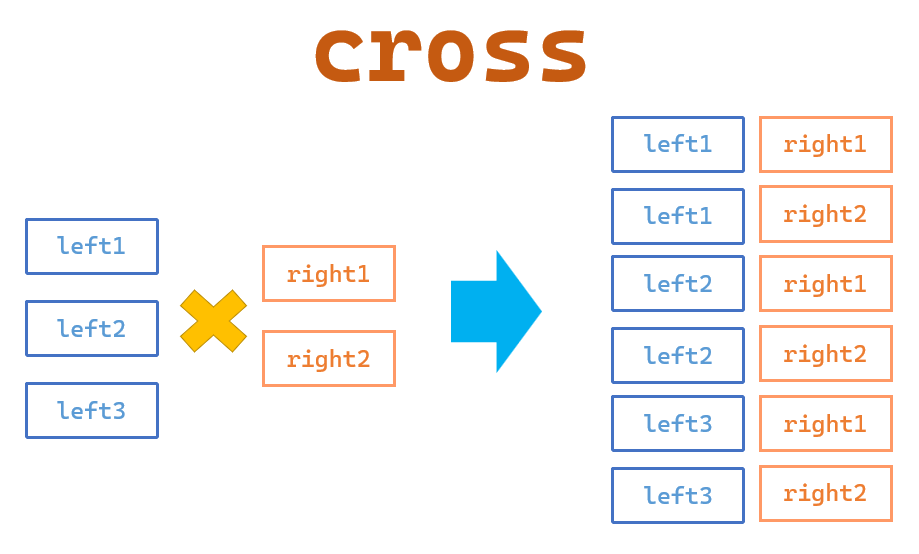

https://medium.com/@akaivdo/pandas-data-combination-1-merge-81fbdf506c85

In [22]:
right_join = pd.merge(df1, df2, how='cross')
display(df1)
display(df2)
display(right_join)

,Key,Value1
0,A,1
1,B,2
2,C,3


,Key,Value2
0,B,4
1,C,5
2,D,6


,Key_x,Value1,Key_y,Value2
0,A,1,B,4
1,A,1,C,5
2,A,1,D,6
3,B,2,B,4
4,B,2,C,5
5,B,2,D,6
6,C,3,B,4
7,C,3,C,5
8,C,3,D,6


### 1. **Self Join**
**Description**:  
Joins a DataFrame with itself. Often used to compare rows within the same dataset.
 
### **Use Cases**:
1. **Hierarchical Relationships**  
   - Model organizational structures (e.g., employees and their managers).  
2. **Time-Series Comparisons**  
   - Track changes over time within the same dataset (e.g., monthly sales vs. previous month).  
3. **Duplicate Detection**  
   - Identify near-identical records (e.g., customer entries with minor spelling differences).


In [25]:
employees = pd.DataFrame({
    'EmployeeID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'ManagerID': [2, 3, None]  # Charlie has no manager
})
self_join = pd.merge(
    employees,
    employees,
    left_on='ManagerID',
    right_on='EmployeeID',
    suffixes=('', '_Manager')
)

In [26]:
display(employees)
display(self_join)

,EmployeeID,Name,ManagerID
0,1,Alice,2.0
1,2,Bob,3.0
2,3,Charlie,NaN


,EmployeeID,Name,ManagerID,EmployeeID_Manager,Name_Manager,ManagerID_Manager
0,1,Alice,2.0,2,Bob,3.0
1,2,Bob,3.0,3,Charlie,NaN


### Hierarchical Indexing, Reshaping and Pivoting

- An entry in a `DataFrame` can be another `DataFrame`. This is the way to represent multi-dimensional tables in pandas.

#### Hierarchical Indexing (MultiIndex)
- What is a MultiIndex?

A hierarchical index, or MultiIndex, allows you to have multiple (two or more) levels of indexing on an axis (row or column). This is particularly useful for representing high-dimensional data in a 2D DataFrame.

- Creating a MultiIndex DataFrame

You can create a MultiIndex DataFrame using the pd.MultiIndex.from_tuples, pd.MultiIndex.from_product, or by setting multiple columns as indices with set_index.


In [2]:

# Create a MultiIndex for rows
index = pd.MultiIndex.from_tuples(
    [('North', 'A'), ('North', 'B'), ('South', 'A'), ('South', 'B')],
    names=['Region', 'Product']  # Name the index levels
)

data = {
    'Q1_Sales': [200, 150, 300, 250],
    'Q2_Sales': [220, 160, 320, 260]
}

df = pd.DataFrame(data, index=index)
print(df)

                Q1_Sales  Q2_Sales
Region Product                    
North  A             200       220
       B             150       160
South  A             300       320
       B             250       260


In [3]:
# From Product (Cartesian Product)
regions = ['North', 'South']
products = ['A', 'B']

# Create all combinations of regions and products
index = pd.MultiIndex.from_product(
    [regions, products],
    names=['Region', 'Product']
)

df = pd.DataFrame({'Q1_Sales': [200, 150, 300, 250]}, index=index)
print(df)

                Q1_Sales
Region Product          
North  A             200
       B             150
South  A             300
       B             250


In [4]:
# Arrays
regions = ['North', 'North', 'South', 'South']
products = ['A', 'B', 'A', 'B']

index = pd.MultiIndex.from_arrays(
    [regions, products],
    names=['Region', 'Product']
)

df = pd.DataFrame({'Q1_Sales': [200, 150, 300, 250]}, index=index)
print(df)

                Q1_Sales
Region Product          
North  A             200
       B             150
South  A             300
       B             250


- MultiIndex Structure

A MultiIndex has levels (unique values per hierarchy) and codes (integer positions mapping to levels).

In [5]:
print(df.index.levels)    # Output: [['North', 'South'], ['A', 'B']]
print(df.index.codes)     # Output: [[0, 0, 1, 1], [0, 1, 0, 1]]

[['North', 'South'], ['A', 'B']]
[[0, 0, 1, 1], [0, 1, 0, 1]]


- Querying a MultiIndex

Selecting Rows



In [7]:
# Select all rows where Region = 'North'
print(df.loc['North'])


         Q1_Sales
Product          
A             200
B             150


In [8]:

# Select rows where Region = 'South' and Product = 'B'
print(df.loc[('South', 'B')])

Q1_Sales    250
Name: (South, B), dtype: int64


- Cross-Section (xs)

Extract data at a specific level:

In [9]:
# Get all rows where Product = 'A'
print(df.xs('A', level='Product'))

# Get sales for 'South' region, all products
print(df.xs('South', level='Region'))

        Q1_Sales
Region          
North        200
South        300
         Q1_Sales
Product          
A             300
B             250


### Reshaping with stack() and unstack()
- a. unstack(): Convert Rows to Columns

Pivot a level of row indices to columns.

The DataFrame.unstack(e) function in pandas is used to pivot (or "unstack") the rows of a MultiIndex DataFrame into columns. Essentially, it transforms the innermost row index level (or any specified level) into columns. This is useful when you want to change the orientation of the data from a long format to a wide format.

- Parameters:

    level: The level (or levels) to unstack. If not provided, the default is level=-1, which corresponds to the innermost index level. You can also specify an integer (for the index level) or a string (for the name of the index level) to unstack a specific level.

    fill_value: This is the value to use to fill missing values. If None, it will leave missing values as NaN.

In [11]:
df.unstack(level=-1, fill_value=None)

Q1_Sales     
Product        A    B
Region               
North        200  150
South        300  250

In [13]:
# Unstack the 'Product' level
unstacked = df.unstack(level='Product') # means we are moving the unique values of the Product index (A and B) into columns.

print(unstacked)

        Q1_Sales     
Product        A    B
Region               
North        200  150
South        300  250


- stack(): Convert Columns to Rows
        Reverse of unstack(). Collapses column labels into row indices.

In [16]:
display(df)
df.stack(level=-1, dropna=True)

Q1_Sales
Region Product          
North  A             200
       B             150
South  A             300
       B             250

Region  Product          
North   A        Q1_Sales    200
        B        Q1_Sales    150
South   A        Q1_Sales    300
        B        Q1_Sales    250
dtype: int64

### Pivoting with pivot_table()

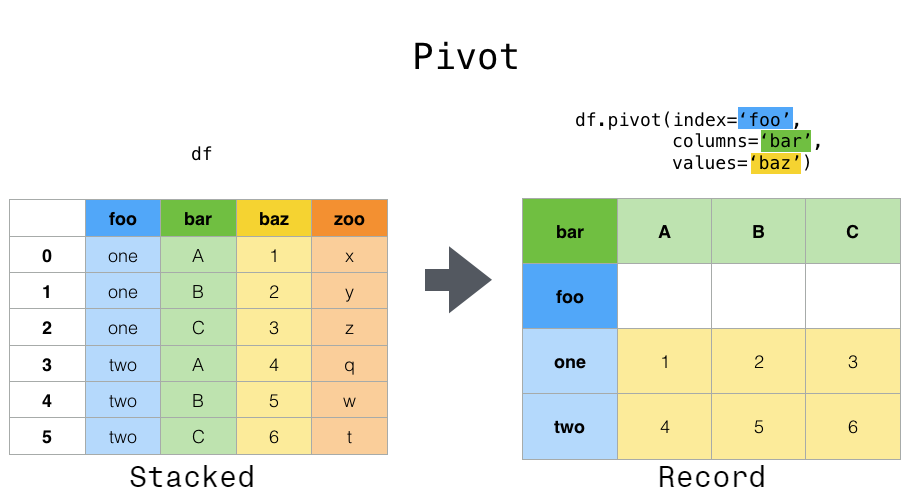 (https://pandas.pydata.org/docs/user_guide/reshaping.html)

#### What is pivot_table?
Aggregates data and reshapes it into a summary table. Similar to Excel pivot tables.
Key Parameters:

values: Column to aggregate.

index: Row labels (hierarchical).

columns: Column labels (hierarchical).

aggfunc: Aggregation function (default: mean).

        DataFrame.pivot(index=None, columns=None, values=None)

- Parameters:

index: The column to use as the new row index (this will be the index in the reshaped DataFrame).

columns: The column to use as the new column headers.

values: The column whose values will populate the new DataFrame.

- Use Cases:

Pivoting is typically used when you have data that includes repeated observations, and you want to reorganize this data so that each unique combination of categories becomes a column.


In [17]:
data = {
    'Date': ['2025-01-01', '2025-01-01', '2025-01-02', '2025-01-02'],
    'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Temperature': [30, 75, 31, 76],
    'Humidity': [80, 10, 79, 9]
}

df = pd.DataFrame(data)

print(df)

         Date         City  Temperature  Humidity
0  2025-01-01     New York           30        80
1  2025-01-01  Los Angeles           75        10
2  2025-01-02     New York           31        79
3  2025-01-02  Los Angeles           76         9


Now, we can use the pivot() function to reshape this DataFrame by pivoting on Date and City, and using Temperature and Humidity as the values:

In [18]:
pivoted_df = df.pivot(index='Date', columns='City', values=['Temperature', 'Humidity'])
print(pivoted_df)


           Temperature             Humidity         
City       Los Angeles New York Los Angeles New York
Date                                                
2025-01-01          75       30          10       80
2025-01-02          76       31           9       79


- Pivot with Aggregation (pivot_table)

Sometimes, you may encounter duplicate entries in your data when pivoting, which can result in errors. To handle such cases, you can use pivot_table(), which allows you to apply an aggregation function (such as sum, mean, etc.) to resolve the conflicts

In [19]:
# Pivot with aggregation
# Example where duplicate values may exist
data = {
    'Date': ['2025-01-01', '2025-01-01', '2025-01-02', '2025-01-02', '2025-01-01'],
    'City': ['New York', 'New York', 'New York', 'Los Angeles', 'Los Angeles'],
    'Temperature': [30, 32, 31, 76, 75],
    'Humidity': [80, 82, 79, 9, 10]
}

df = pd.DataFrame(data)

# Using pivot_table to aggregate duplicate entries
pivoted_table = df.pivot_table(index='Date', columns='City', values=['Temperature', 'Humidity'], aggfunc='mean')

print(pivoted_table)


              Humidity          Temperature         
City       Los Angeles New York Los Angeles New York
Date                                                
2025-01-01        10.0     81.0        75.0     31.0
2025-01-02         9.0     79.0        76.0     31.0


### Grouping and Aggregation

- One of the most important features of `pandas` is the ability to group tables according to different columns and produce informative summaries that can then be visualized.


- Grouping and aggregation implement the _split-apply-combine_ paradigm.
  - *Split*: split a table into groups based on one or more _keys_.
  - *Apply*: apply a function to each group.
  - *Combine*: combine the results yielding a new table.
  
  
- The relevant functions that implement this are: `groupby`, optimized aggregation functions (`count`, `sum`, `mean`, `std` etc.), and the custom aggregation function `agg` which can aggregate according to a specified function.

- Helper functions are also provided to produce pivot tables (`pivot_table`) and cross tabulations (`crosstab`).

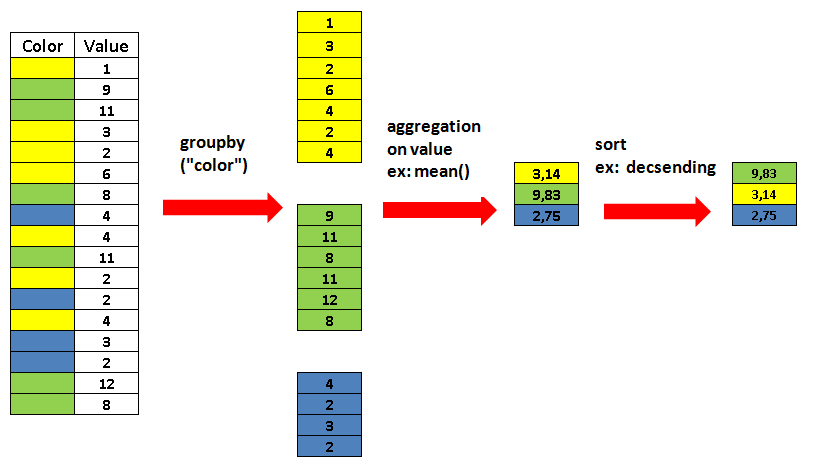 (https://medium.com/star-gazers/groupby-in-pandas-5df348e293f8)

In [21]:
data = pd.read_csv('Jobs_NYC_Postings_.csv')
data

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,695844,HOUSING PRESERVATION & DVLPMNT,Internal,1,.Net Developer for HPD TECH,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,13632,02,"Technology, Data & Innovation",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,12/31/2024,31-MAR-2025,12/31/2024,01/20/2025
1,692867,DEPT OF HEALTH/MENTAL HYGIENE,External,2,"Public Health Inspector, Bureau of Food Safety...",PUBLIC HEALTH SANITARIAN,Competitive-1,31215,01,"Health Public Safety, Inspections, & Enforcement",...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,12/11/2024,11-DEC-2025,12/11/2024,01/20/2025
2,545587,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Senior Stationary Engineer Electric,SENIOR STATIONARY ENGINEER (EL,Competitive-1,91639,00,Building Operations & Maintenance,...,Appointments are subject to OMB approval; For ...,Click the Apply Now button.,NaN,NaN,NaN,New York City residency is generally required ...,08/12/2022,NaN,08/12/2022,01/20/2025
3,552760,DEPT OF ENVIRONMENT PROTECTION,Internal,2,MECHANICAL ENGINEERING INTERN,MECHANICAL ENGINEERING INTERN,Competitive-1,20403,00,"Engineering, Architecture, & Planning",...,Appointments are subject to OMB approval. For...,Click Apply Now button,35 hours per week/day,"96-05 Horace Harding Expway, 2nd Floor, Corona...",NaN,New York City Residency is not required for th...,10/14/2022,NaN,10/14/2022,01/20/2025
4,686438,DEPT OF ENVIRONMENT PROTECTION,External,1,ASSISTANT PROJECT MANAGER,CIVIL ENGINEERING INTERN,Competitive-1,20202,00,"Engineering, Architecture, & Planning Public S...",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,12/31/2024,NaN,12/31/2024,01/20/2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859,691838,CAMPAIGN FINANCE BOARD,Internal,1,DEPUTY CHIEF PEOPLE OFFICER - PEOPLE & CULTURE,ASSOCIATE EXECUTIVE PROGRAM MA,Pending Classification-2,06939,M3,"Administration & Human Resources Policy, Resea...",...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,12/16/2024,NaN,12/16/2024,01/20/2025
5860,695400,DEPT OF DESIGN & CONSTRUCTION,External,1,Chief,CONSTRUCTION PROJECT MANAGER,Competitive-1,34202,03,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,01/02/2025,NaN,01/02/2025,01/20/2025
5861,691612,OFF OF PAYROLL ADMINISTRATION,Internal,1,Legal Administrative Coordinator,ADM MANAGER-NON-MGRL FRM M1/M2,Competitive-1,1002C,01,Legal Affairs,...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,12/05/2024,NaN,12/05/2024,01/20/2025
5862,639840,DEPT OF ENVIRONMENT PROTECTION,External,1,EHS Training Specialist,ADMINISTRATIVE STAFF ANALYST (,Competitive-1,1002A,00,"Engineering, Architecture, & Planning Policy, ...",...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,07/30/2024,NaN,07/30/2024,01/20/2025


In [22]:
data.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [23]:
gb = data.groupby('Posting Type')
type(gb)

pandas.core.groupby.generic.DataFrameGroupBy

In [26]:
data.groupby('Level').sum()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
Level,,,,,,,,,,,,,,,,,,,,,
00,1542628750,DEPT OF ENVIRONMENT PROTECTIONDEPT OF ENVIRONM...,InternalInternalExternalInternalExternalIntern...,7729,Senior Stationary Engineer ElectricMECHANICAL ...,SENIOR STATIONARY ENGINEER (ELMECHANICAL ENGIN...,Competitive-1Competitive-1Competitive-1Non-Com...,9163920403202025605810234102349571091915202109...,"Building Operations & MaintenanceEngineering, ...",FFFFPPFFFFFFFFFFFFFFFFFFFFPFFPFFFFFFFFFFFFFFFF...,...,Appointments are subject to OMB approval; For ...,Click the Apply Now button.Click Apply Now but...,35 hours per week/day35hrsMonday - Friday 35+...,"96-05 Horace Harding Expway, 2nd Floor, Corona...",0.0,New York City residency is generally required ...,08/12/202210/14/202212/31/202401/11/202501/16/...,28-FEB-202528-MAR-202513-FEB-202505-FEB-202508...,08/12/202210/14/202212/31/202401/13/202501/16/...,01/20/202501/20/202501/20/202501/20/202501/20/...
01,513616999,DEPT OF HEALTH/MENTAL HYGIENEDEPT OF ENVIRONME...,ExternalExternalInternalInternalInternalIntern...,1816,"Public Health Inspector, Bureau of Food Safety...",PUBLIC HEALTH SANITARIANASSOCIATE PROJECT MANA...,Competitive-1Competitive-1Competitive-1Non-Com...,3121522427202152174421744708172184951191102093...,"Health Public Safety, Inspections, & Enforceme...",FFFFFFFFPFFPFPFFFFFFFFFFFFFFFFFFFPFFFFFFFFFFFF...,...,Appointments are subject to OMB approval. For ...,Click Apply Now buttonApply online with a cove...,"35 hours per week/day (Non-trade titles), 40 h...","96-05 Horace Harding Expressway, 2nd floor, Co...",0.0,New York City residency is generally required ...,12/11/202402/19/202311/12/202405/23/202411/19/...,11-DEC-202523-MAY-202501-FEB-202513-MAY-202525...,12/11/202402/19/202311/12/202410/01/202411/19/...,01/20/202501/20/202501/20/202501/20/202501/20/...
02,735876321,HOUSING PRESERVATION & DVLPMNTHRA/DEPT OF SOCI...,InternalExternalInternalInternalExternalIntern...,1796,.Net Developer for HPD TECHGENERAL TIMEKEEPING...,COMPUTER SPECIALIST (SOFTWARE)PRINCIPAL ADMINI...,Competitive-1Competitive-1Competitive-1Competi...,1363210124511912011310124126262242740502510111...,"Technology, Data & InnovationAdministration & ...",FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFPFFFFFFFFFFFFF...,...,"In addition, the Human Resources Administratio...",APPLICANTS MUST BE PERMANENT IN THE PRINCIPAL ...,9:00 AM to 5:00 PM9:00 am to 5:00 pm35 Hrs. / ...,4 World Trade Center4 World Trade Center34-02 ...,0.0,New York City Residency is not required for th...,12/31/202409/26/202409/26/202408/14/202410/21/...,31-MAR-202526-SEP-202528-JAN-202526-DEC-202528...,12/31/202410/01/202409/26/202408/14/202410/21/...,01/20/202501/20/202501/20/202501/20/202501/20/...
03,433436711,HRA/DEPT OF SOCIAL SERVICESHRA/DEPT OF SOCIAL ...,ExternalExternalInternalExternalExternalExtern...,832,Clerical AssociateCA PERT SENIOR CASE REVIEWER...,CLERICAL ASSOCIATEPRINCIPAL ADMINISTRATIVE ASS...,Competitive-1Competitive-1Competitive-1Competi...,102511012422122102511002C342021012421744300872...,Social ServicesConstituent Services & Communit...,FFFFFFFFFFFFFFFFFFFFFFFFPFFFFFFFFFFFFFFFFFFFFF...,...,**LOAN FORGIVENESS The federal government pro...,APPLICANTS MUST BE PERMANENT IN THE CLERICAL A...,Monday to Friday 9 am to 5 pm.9am â 5pm Flex...,4 World Trade Center150 Greenwich Street 40th ...,0.0,New York City residency is generally required ...,07/26/202303/08/202401/07/202508/18/202312/10/...,10-DEC-202529-JAN-202526-SEP-202529-JAN-202531...,11/02/202303/28/202401/07/202508/21/202312/13/...,01/20/202501/20/202501/20/202501/20/202501/20/...
04,87593000,HRA/DEPT OF SOCIAL SERVICESHRA/DEPT OF SOCIAL ...,InternalExternalInternalExternalExternalExtern...,144,SENIOR MICROSOFT POWER B

In [27]:
data.groupby("Level")["Salary Range From"].mean()

# median, max, min, sum
# possible functions https://pandas.pydata.org/docs/reference/groupby.html

Level
00     55350.196593
01     53633.932417
02     69249.423567
03     75990.149428
04     58925.846512
1A     72366.000000
1B     65176.200000
3A     40957.000000
4A    104355.368421
4B    108341.272727
M1     79292.061856
M2     79721.632653
M3     89001.883117
M4    112763.134146
M5    141055.600000
M6    202222.222222
M7    129717.888889
M8    157420.000000
MY     62328.000000
Name: Salary Range From, dtype: float64

In [28]:
data.groupby("Level")["Salary Range From"].agg(["mean", "median"])

,mean,median
Level,,
00,55350.196593,59116.0
01,53633.932417,58377.0
02,69249.423567,71979.0
03,75990.149428,81108.0
04,58925.846512,45040.0
1A,72366.000000,72366.0
1B,65176.200000,68202.0
3A,40957.000000,40957.0
4A,104355.368421,106117.0


In [29]:
def do_sth_to_groups(group):
    print(group)
    print('*******')
    
data.groupby("Level")["Salary Range From"].apply(do_sth_to_groups)

2         618.24
3       51413.00
4       57866.00
11      60889.00
13         16.88
          ...   
5847    60889.00
5855       17.00
5856    62370.00
5858    64242.00
5862    92283.00
Name: 00, Length: 2376, dtype: float64
*******
1       51460.0
8       67757.0
12      76262.0
16      70087.0
32      72190.0
         ...   
5815    72190.0
5821    71163.0
5836    66042.0
5848    72190.0
5861    66349.0
Name: 01, Length: 788, dtype: float64
*******
0       96086.0
7       57976.0
25      53074.0
36      46019.0
37      57976.0
         ...   
5849    84018.0
5851    81571.0
5852    53057.0
5854    84981.0
5863    90667.0
Name: 02, Length: 1142, dtype: float64
*******
5       39763.0000
18      64137.0000
19      82494.0000
27         21.7641
33      81659.0000
           ...    
5802    66075.0000
5810    95070.0000
5840    65574.0000
5850    95070.0000
5860    81108.0000
Name: 03, Length: 679, dtype: float64
*******
22      108071.0
96       90870.0
152     108071.0
202      45040.

Level
00    None
01    None
02    None
03    None
04    None
1A    None
1B    None
3A    None
4A    None
4B    None
M1    None
M2    None
M3    None
M4    None
M5    None
M6    None
M7    None
M8    None
MY    None
Name: Salary Range From, dtype: object

In [30]:
def do_sth_to_groups(group):
    print(type(group))
    print('*******')
    
data.groupby("Level")["Salary Range From"].apply(do_sth_to_groups)

<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******
<class 'pandas.core.series.Series'>
*******


Level
00    None
01    None
02    None
03    None
04    None
1A    None
1B    None
3A    None
4A    None
4B    None
M1    None
M2    None
M3    None
M4    None
M5    None
M6    None
M7    None
M8    None
MY    None
Name: Salary Range From, dtype: object

In [31]:
data.groupby(["Level","Agency","Posting Type"])["Salary Range From"].mean()

Level  Agency                      Posting Type
00     ADMIN FOR CHILDREN'S SVCS   External         55212.484000
                                   Internal         57207.530909
       ADMIN TRIALS AND HEARINGS   External         58286.000000
                                   Internal         58286.000000
       BOARD OF CORRECTION         External         60889.000000
                                                       ...      
M8     DEPT OF PARKS & RECREATION  External        210000.000000
MY     OFFICE OF CRIMINAL JUSTICE  External         64142.000000
                                   Internal         64142.000000
       OFFICE OF RACIAL EQUITY     External         58700.000000
                                   Internal         58700.000000
Name: Salary Range From, Length: 563, dtype: float64